In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import nltk

# 2. Accessing Text Corpora and Lexical Resources

## 2.2 Conditional Frequency Distributions

### 2.2.1 Conditions and Events

In [5]:
text = ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [6]:
pairs = [('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ...]

### 2.2.2 Counting Words by Genre

In [9]:
from nltk.corpus import brown

In [10]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

In [11]:
genre_word = [
    (genre, word)
    for genre in ['news', 'romance']
    for word in brown.words(categories=genre)
]

In [12]:
len(genre_word)
# 170576

170576

In [13]:
genre_word[:4]
# [('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')] # [_start-genre]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [14]:
genre_word[-4:]
# [('romance', 'afraid'), ('romance', 'not'), ('romance', "''"), ('romance', '.')] # [_end-genre]

[('romance', 'afraid'),
 ('romance', 'not'),
 ('romance', "''"),
 ('romance', '.')]

In [15]:
cfd = nltk.ConditionalFreqDist(genre_word)

In [16]:
cfd
# <ConditionalFreqDist with 2 conditions>

<ConditionalFreqDist with 2 conditions>

In [17]:
cfd.conditions()
# ['news', 'romance'] # [_conditions-cfd]

['news', 'romance']

In [18]:
print(cfd['news'])
# <FreqDist with 14394 samples and 100554 outcomes>

<FreqDist with 14394 samples and 100554 outcomes>


In [21]:
print(cfd['romance'])
# <FreqDist with 8452 samples and 70022 outcomes>

<FreqDist with 8452 samples and 70022 outcomes>


In [22]:
cfd['romance'].most_common(20)
# [(',', 3899), ('.', 3736), ('the', 2758), ('and', 1776), ('to', 1502),
# ('a', 1335), ('of', 1186), ('``', 1045), ("''", 1044), ('was', 993),
# ('I', 951), ('in', 875), ('he', 702), ('had', 692), ('?', 690),
# ('her', 651), ('that', 583), ('it', 573), ('his', 559), ('she', 496)]

[(',', 3899),
 ('.', 3736),
 ('the', 2758),
 ('and', 1776),
 ('to', 1502),
 ('a', 1335),
 ('of', 1186),
 ('``', 1045),
 ("''", 1044),
 ('was', 993),
 ('I', 951),
 ('in', 875),
 ('he', 702),
 ('had', 692),
 ('?', 690),
 ('her', 651),
 ('that', 583),
 ('it', 573),
 ('his', 559),
 ('she', 496)]

In [23]:
cfd['romance']['could']
# 193

193

### 2.2.3 Plotting and Tabulating Distributions

In [24]:
from nltk.corpus import inaugural

In [25]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target)
)

In [26]:
from nltk.corpus import udhr

In [27]:
languages = [
    'Chickasaw', 'English', 'German_Deutsch',
    'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik'
]

In [28]:
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1')
)

In [32]:
cfd.tabulate(
    conditions=['English', 'German_Deutsch'], 
    samples=range(10), 
    cumulative=True
)
#                   0    1    2    3    4    5    6    7    8    9
#        English    0  185  525  883  997 1166 1283 1440 1558 1638
# German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


In [40]:
days = [
    'Monday', 'Tuesday', 'Wednesday', 
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]

cfd = nltk.ConditionalFreqDist(
    (genre, day)
    for day in days
    for genre in ['news', 'romance']
    for word in brown.words(categories=genre)
    if word == day
)

In [47]:
cfd.tabulate()

           Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
   news        41        54        33        51        20        43        22 
romance         3         2         4         5         1         3         3 


In [48]:
cfd.tabulate(samples=days)

           Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
   news        54        43        22        20        41        33        51 
romance         2         3         3         1         3         4         5 


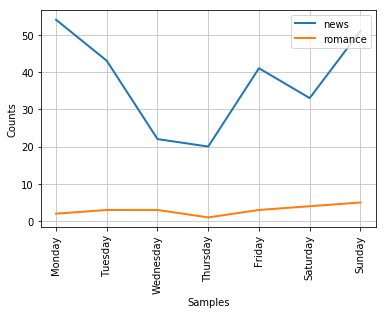

In [49]:
cfd.plot(samples=days)

### 2.2.4 Generating Random Text with Bigrams

In [25]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven',
'and', 'the', 'earth', '.']

In [26]:
list(nltk.bigrams(sent))
# [('In', 'the'), ('the', 'beginning'), ('beginning', 'God'), ('God', 'created'),
# ('created', 'the'), ('the', 'heaven'), ('heaven', 'and'), ('and', 'the'),
# ('the', 'earth'), ('earth', '.')]

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

In [27]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

In [28]:
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [29]:
cfd['living']
# FreqDist({'creature': 7, 'thing': 4, 'substance': 2, ',': 1, '.': 1, 'soul': 1})

FreqDist({',': 1,
          '.': 1,
          'creature': 7,
          'soul': 1,
          'substance': 2,
          'thing': 4})

In [30]:
generate_model(cfd, 'living')
# living creature that he said , and the land of the land of the land

living creature that he said , and the land of the land of the land 